# Creating PySpark Session

In [130]:
# Importing libraries
import findspark
import pyspark
from pyspark.sql import SparkSession

# Initializing PySpark
findspark.init('C:\\Users\\Geetha\\OneDrive\\Desktop\\Big Data\\spark-3.5.0-bin-hadoop3')

# Creating a PySpark session
spark = SparkSession.builder.appName("StockMarket").getOrCreate()


__PySpark session:__

     findspark.init: used to initialize Spark
     PySpark initializes PySpark session 'StockMarket'
     Data is loaded and displayed


In [131]:
# Read the CSV file into a PySpark DataFrame
spark_df = spark.read.csv("fh_5yrs.csv", header=True, inferSchema=True)

# Show the content of the PySpark DataFrame
spark_df.show()

+----------+------+------------------+------------------+------------------+------------------+------------------+------+
|      date|volume|              open|              high|               low|             close|          adjclose|symbol|
+----------+------+------------------+------------------+------------------+------------------+------------------+------+
|2020-07-02|257500|17.639999389648438|17.739999771118164|  17.6200008392334|17.709999084472656|17.709999084472656|  AAAU|
|2020-07-01|468100|17.729999542236328|17.729999542236328|17.540000915527347| 17.68000030517578| 17.68000030517578|  AAAU|
|2020-06-30|319100|17.649999618530273|17.799999237060547|17.610000610351562|17.780000686645508|17.780000686645508|  AAAU|
|2020-06-29|405500|17.670000076293945|17.690000534057614|  17.6299991607666| 17.68000030517578| 17.68000030517578|  AAAU|
|2020-06-26|335100|17.489999771118164|17.670000076293945|17.420000076293945|17.670000076293945|17.670000076293945|  AAAU|
|2020-06-25|246800|17.60

Date: Date indicates the date of each transaction from 2015 to 2020.

Open: Open indicates opening price, denoting the initial transaction price per share in the beginning of a day.

High: High indicates the highest price during the trading in a day. 

Low: Low indicates the lowest price for the trading in a day.

Close: Close indicates the closing price, representing the transaction price at the end of trading day.

Close Adjusted: The adjusted closing price is adjusted to dividends and stock splits. 

Volume: The number of stocks of a company transacted in a day. 

Symbol: The unique identifier or ticker for a stock of a company.





Feature Categorization:

* Temporal Features: Date (Timestamp)
* Quantitative Features/Continuous Variables: Volume, Open, High, Low, Close, Adjclose
* Qualitative Features: Symbol/Ticker

# Data Characteristics

In [3]:
#Number of rows
num_rows = spark_df.count()
num_rows

6852038

In [4]:
#Number of columns
num_columns = len(spark_df.columns)
num_columns

8

In [5]:
# Print the shape
print("Shape of the PySpark DataFrame: ({}, {})".format(num_rows, num_columns))

Shape of the PySpark DataFrame: (6852038, 8)


There are 6,852,038 rows and 8 columns

In [6]:
from pyspark.sql import functions as F

# Range of dates
date_range = spark_df.agg(F.min("Date").alias("min_date"), F.max("Date").alias("max_date")).collect()[0]

# Display date range
print(f"Data ranges from {date_range['min_date']} to {date_range['max_date']}")

Data ranges from 2015-01-02 to 2020-07-02


In [7]:
# Checking the count of total companies.
total_companies_count = spark_df.select("symbol").distinct().count()

# Displaying the count
print(f"Total number of unique companies: {total_companies_count}")


Total number of unique companies: 6335


In [8]:
# Datatype
spark_df.printSchema()

root
 |-- date: date (nullable = true)
 |-- volume: long (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- adjclose: double (nullable = true)
 |-- symbol: string (nullable = true)



date -> date format and is used for storing date-related information

symbol -> string

volume -> long (i.e., integer)

open, high, low, close, and adjclose -> double (i.e., floating point)

In [9]:
# Importing necessary libraries
import findspark
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import col, sum
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.sql import SparkSession

# Initializing PySpark
findspark.init('C:\\Users\\Geetha\\OneDrive\\Desktop\\Big Data\\spark-3.5.0-bin-hadoop3')

# Creating a PySpark session
spark = SparkSession.builder.appName("StockMarketAnalysis").getOrCreate()


# Data Preprocessing

In [10]:
from pyspark.sql.functions import col

# Check null values in each columns
missing_values = spark_df.select([sum(col(column).isNull().cast("int")).alias(column) for column in spark_df.columns])

# Show the missing values counts
missing_values.show()

+----+------+----+----+---+-----+--------+------+
|date|volume|open|high|low|close|adjclose|symbol|
+----+------+----+----+---+-----+--------+------+
|   0|     0|   0|   0|  0|    0|       0|     0|
+----+------+----+----+---+-----+--------+------+



As there are no missing values, no handling of null operation is performed.

# Select 5 stocks

In [11]:
# List of car company symbols

company_symbols = ['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA']


# Filter stocks

In [12]:
# List of 5 company symbols
company_symbols = ['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA']

from pyspark.sql.functions import col, count

# Filter DataFrame for 5 company symbols
company_df = spark_df.filter(col('symbol').isin(company_symbols))

# Check entry counts for each car company symbol
company_counts = company_df.groupBy('symbol').agg(count('*').alias('entry_count')).orderBy('entry_count', ascending=False)

# Display the result
company_counts.show(truncate=False)


+------+-----------+
|symbol|entry_count|
+------+-----------+
|AAPL  |1385       |
|AMZN  |1385       |
|GOOG  |1385       |
|MSFT  |1385       |
|TSLA  |1385       |
+------+-----------+



Filtered a list of company using symbols

Calculated the number of occurences

Arranged in descending order

In [13]:
# List of symbols for 5 companies
companies = ['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA']

# Combine all 5 company symbols
all_symbols = companies 

# Filter data for each industry
filtered_df = spark_df.filter(col('symbol').isin(all_symbols))

# Show the filtered data
filtered_df.show()

+----------+--------+------------------+------------------+------------------+------------------+------------------+------+
|      date|  volume|              open|              high|               low|             close|          adjclose|symbol|
+----------+--------+------------------+------------------+------------------+------------------+------------------+------+
|2020-07-02|28484300| 367.8500061035156| 370.4700012207031| 363.6400146484375| 364.1099853515625| 364.1099853515625|  AAPL|
|2020-07-01|27684300| 365.1199951171875| 367.3599853515625| 363.9100036621094| 364.1099853515625| 364.1099853515625|  AAPL|
|2020-06-30|35055800| 360.0799865722656| 365.9800109863281|             360.0| 364.7999877929688| 364.7999877929688|  AAPL|
|2020-06-29|32661500|            353.25| 362.1700134277344| 351.2799987792969| 361.7799987792969| 361.7799987792969|  AAPL|
|2020-06-26|51314200| 364.4100036621094| 365.3200073242188| 353.0199890136719| 353.6300048828125| 353.6300048828125|  AAPL|
|2020-06

# Check Outliers

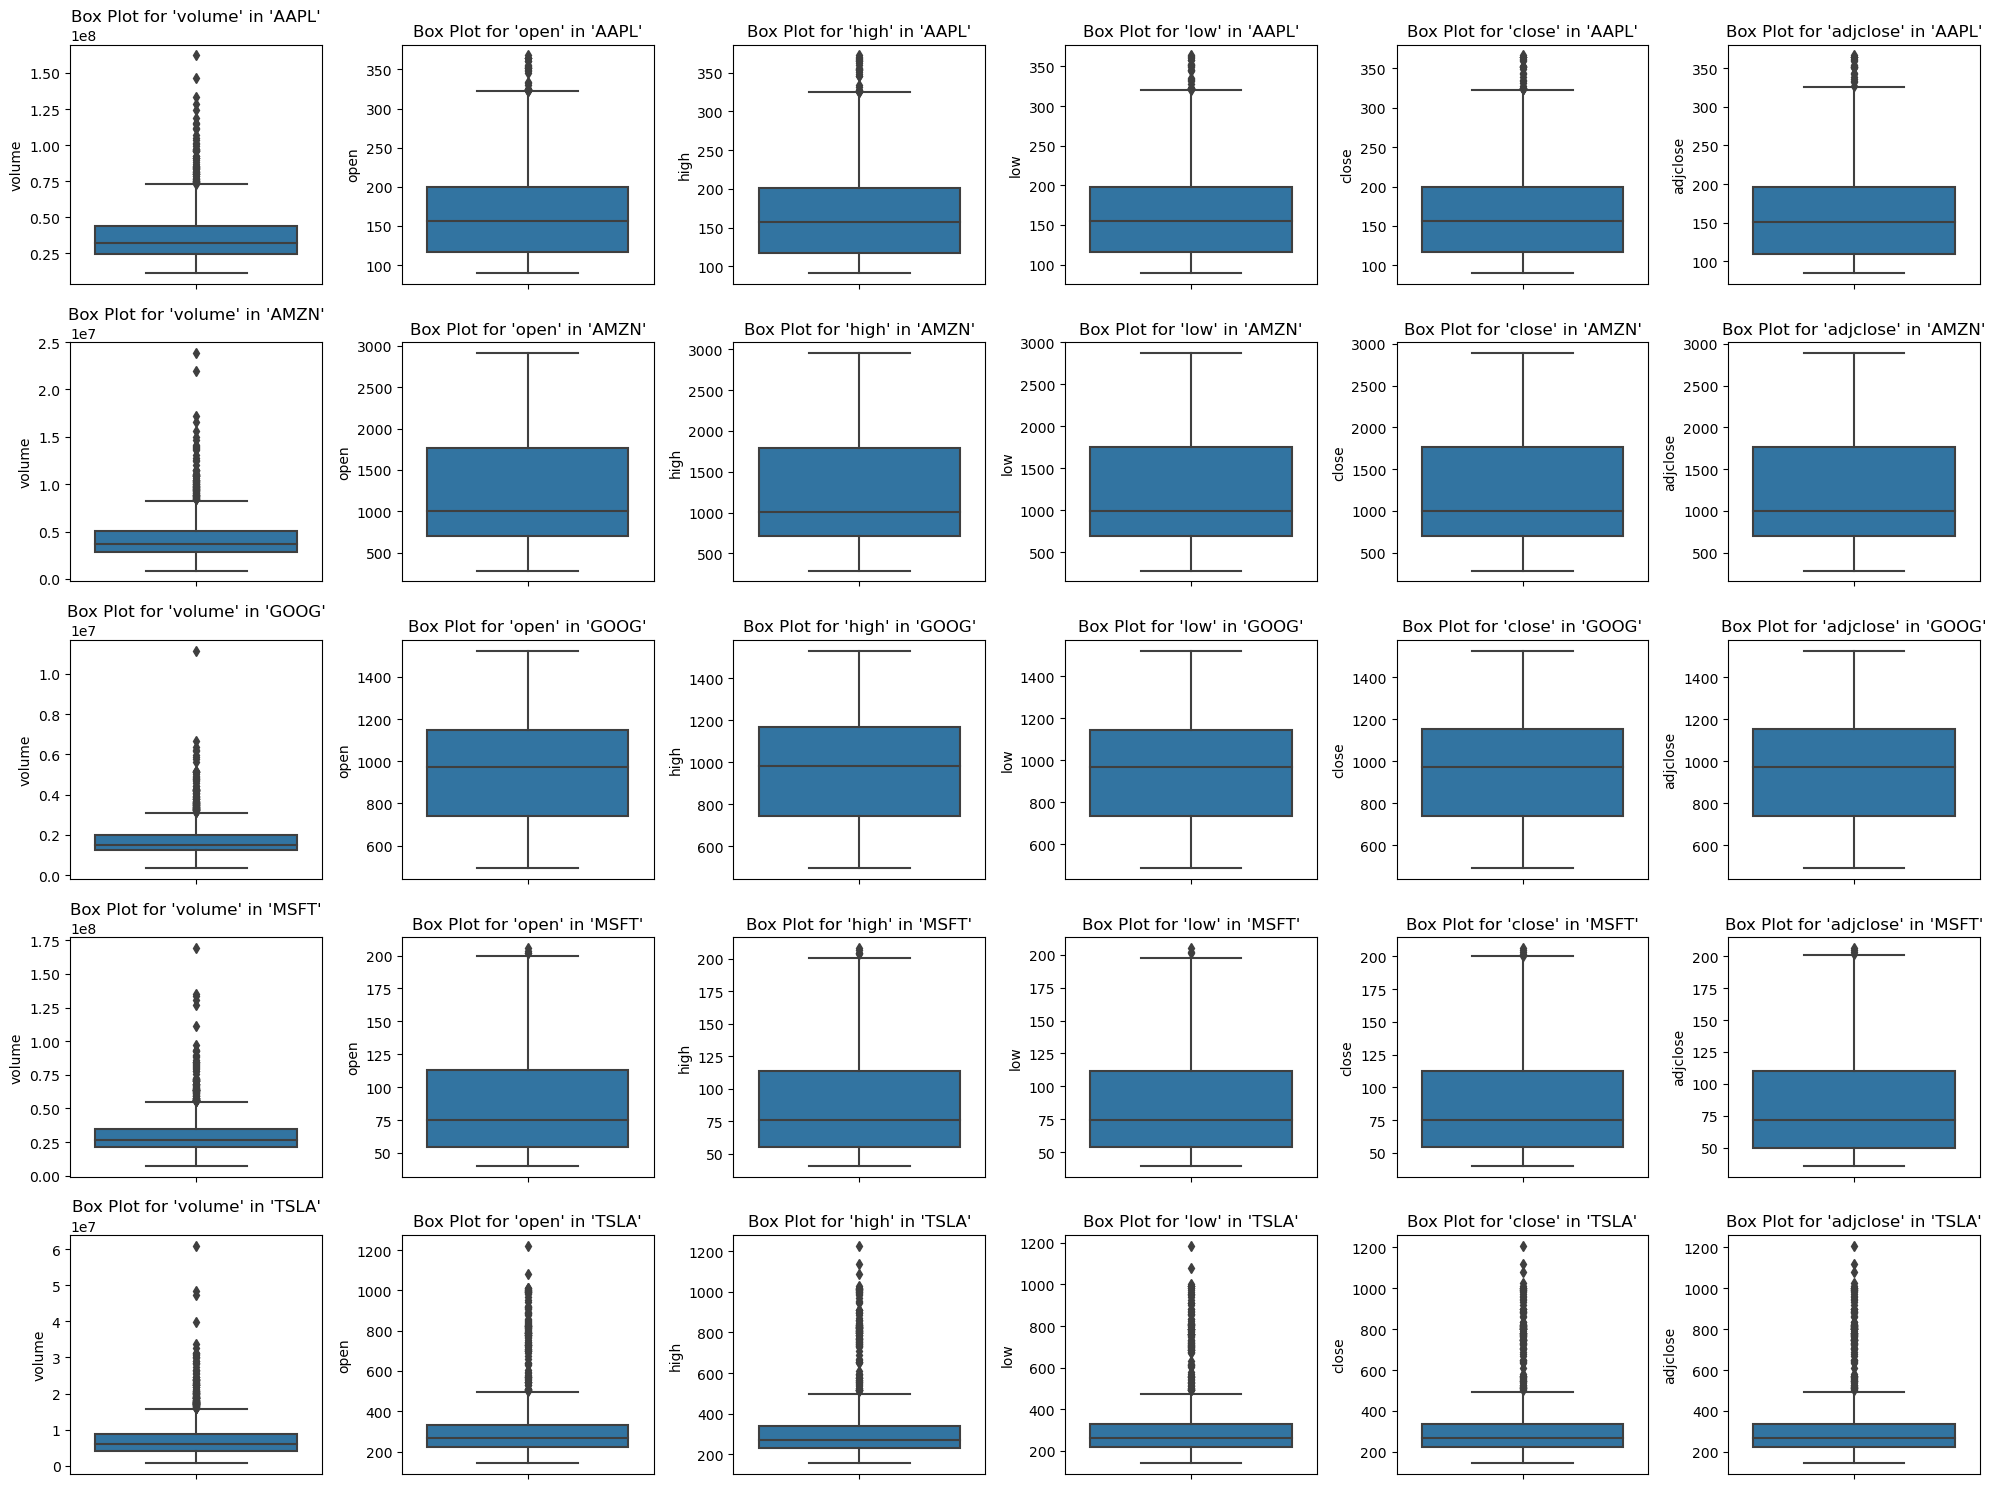

In [14]:
# List of symbols for 5 companies
companies = ['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA']

# Combine all 5 company symbols
all_symbols = companies 

# Filter data for each industry
filtered_df = spark_df.filter(F.col('symbol').isin(all_symbols))

# Convert the 'date' column to timestamp type
filtered_df = filtered_df.withColumn('date', F.to_timestamp(F.col('date')))

# Get unique symbols from the DataFrame
unique_symbols = [row['symbol'] for row in filtered_df.select('symbol').distinct().collect()]

# Plot all vertical box plots in a single figure
selected_columns = ['volume', 'open', 'high', 'low', 'close', 'adjclose']

plt.figure(figsize=(20, 15))

for i, symbol in enumerate(unique_symbols):
    symbol_df = filtered_df.filter(filtered_df['symbol'] == symbol).select(selected_columns).toPandas()
    
    for j, column in enumerate(selected_columns):
        plt.subplot(len(unique_symbols), len(selected_columns), i * len(selected_columns) + j + 1)
        sns.boxplot(y=symbol_df[column])
        plt.title(f"Box Plot for '{column}' in '{symbol}'")

plt.tight_layout()
plt.show()

Although there are outliers, it is not advisable to remove or modify them, which may provide significant market events.

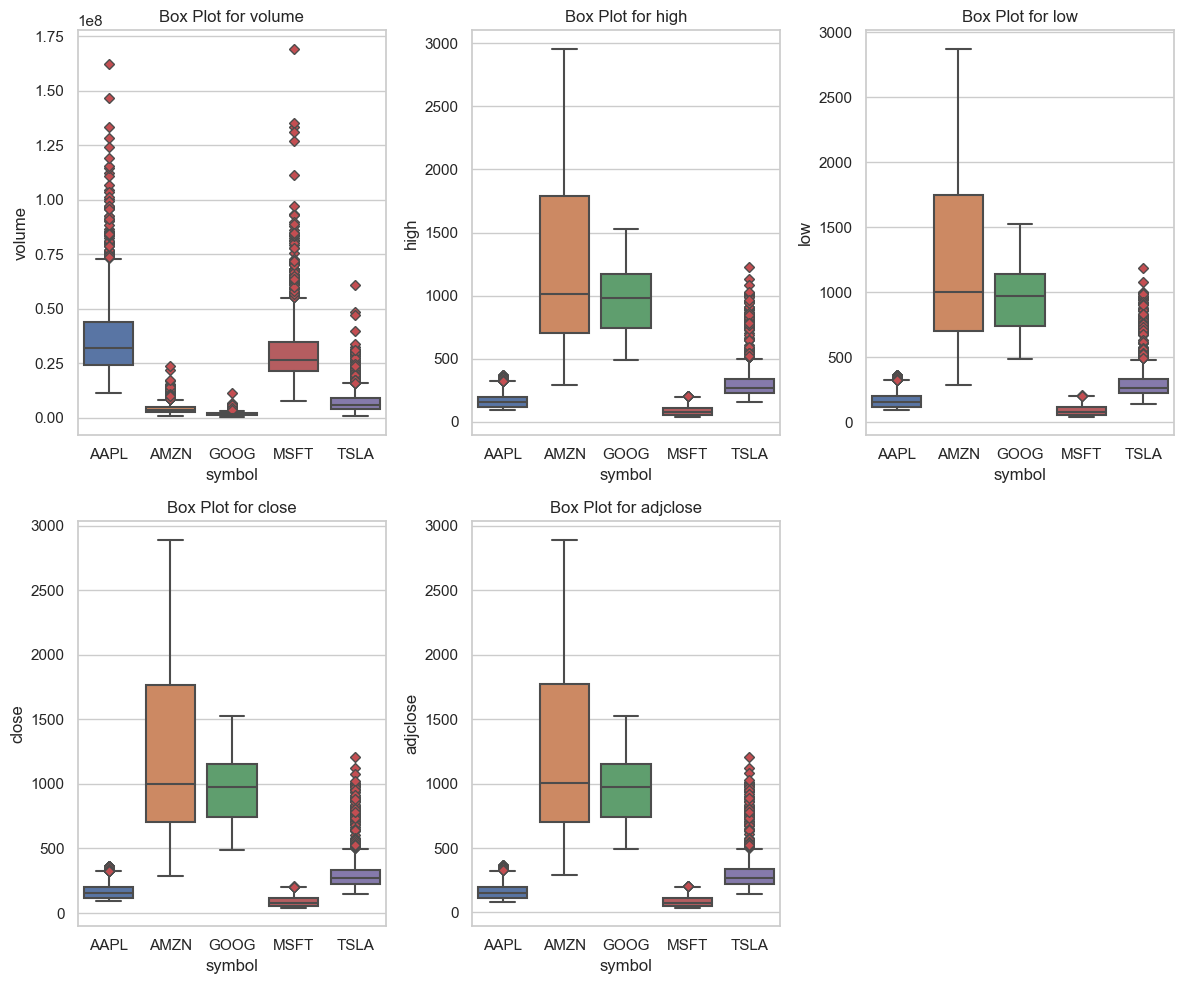

In [15]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = filtered_df.toPandas()

# Select numerical columns for the box plot
numerical_columns = ['volume', 'high', 'low', 'close', 'adjclose']

# Create box plots for each numerical variable grouped by 'symbol'
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

for numerical_column in numerical_columns:
    plt.subplot(2, 3, numerical_columns.index(numerical_column) + 1)
    sns.boxplot(data=pandas_df, x='symbol', y=numerical_column, showfliers=True,
                flierprops=dict(markerfacecolor='r', marker='D'))
    plt.title(f'Box Plot for {numerical_column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Exploratory Data Analysis

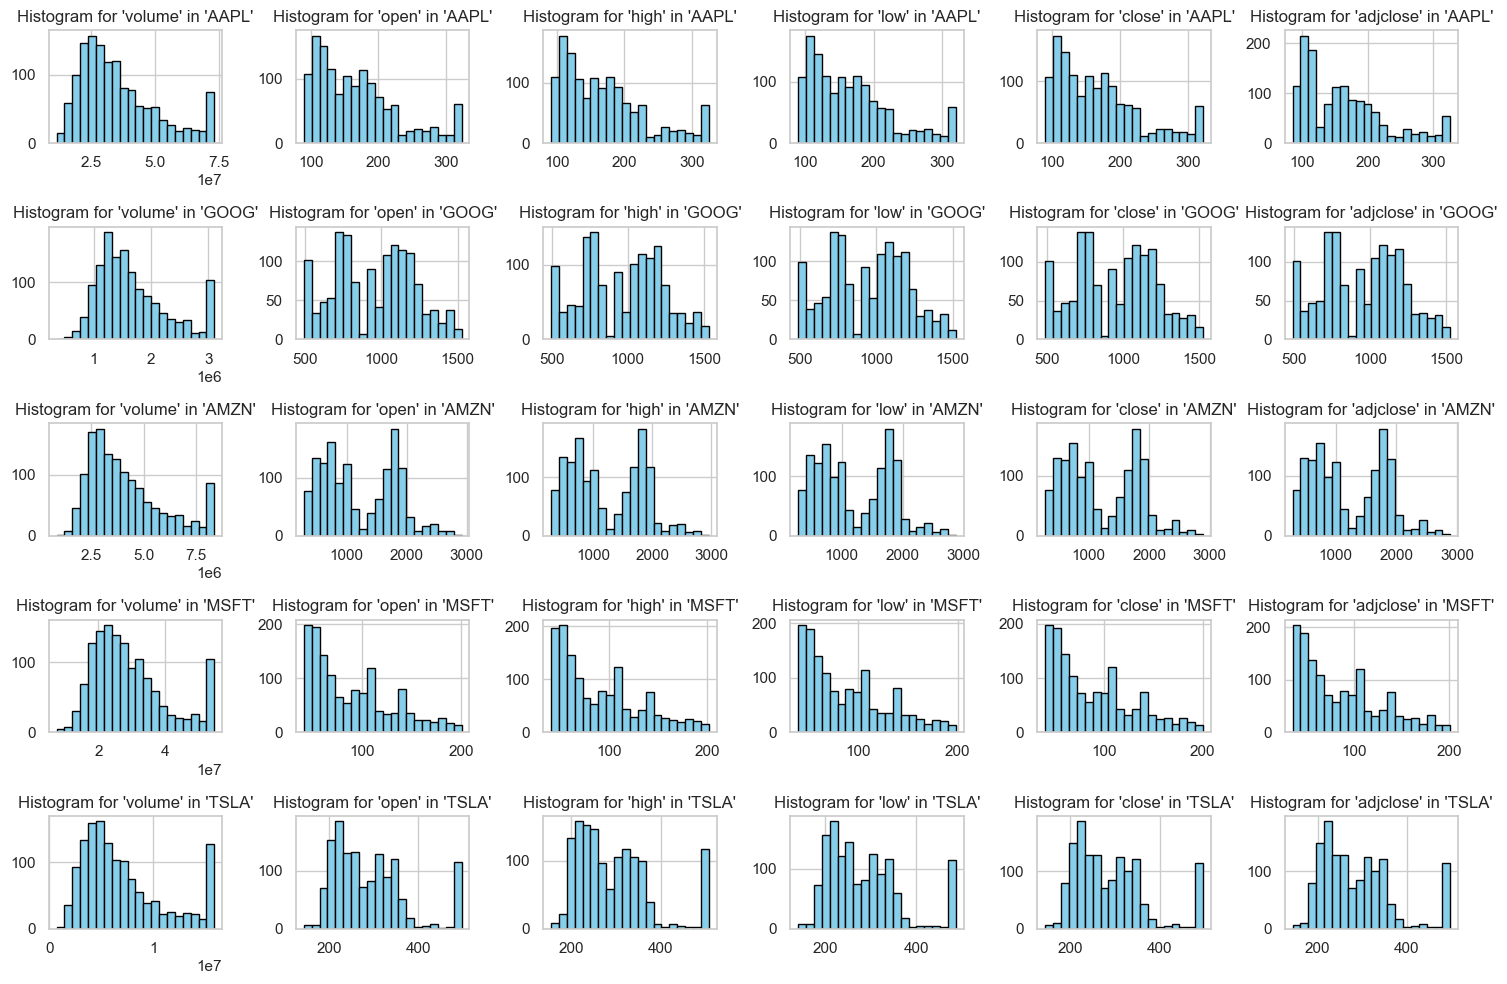

In [17]:
# List of symbols for 5 companies
companies = ['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA']

# Combine all 5 company symbols
all_symbols = companies 

# Filter data for each industry
filtered_df = spark_df.filter(F.col('symbol').isin(all_symbols))

# Convert the 'date' column to timestamp type
filtered_df = filtered_df.withColumn('date', F.to_timestamp(F.col('date')))

# Define IQR factor
iqr_factor = 1.5

# Create Histograms for all stocks
plt.figure(figsize=(15, 10))

# Loop through each symbol for Histograms
for i, symbol in enumerate(companies):
    # Filter the DataFrame for rows where the symbol is the current one in the loop
    symbol_df = filtered_df.filter(filtered_df['symbol'] == symbol).select(selected_columns).toPandas()

    # Capping using IQR for Histograms
    for column in selected_columns:
        Q1 = symbol_df[column].quantile(0.25)
        Q3 = symbol_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - iqr_factor * IQR
        upper_limit = Q3 + iqr_factor * IQR
        symbol_df[column] = symbol_df[column].clip(lower=lower_limit, upper=upper_limit)

    # Loop through each column for Histograms
    for j, column in enumerate(selected_columns):
        plt.subplot(len(companies), len(selected_columns), i * len(selected_columns) + j + 1)
        plt.hist(symbol_df[column], bins=20, color='skyblue', edgecolor='black')  # Adjust 'bins' as needed
        plt.title(f"Histogram for '{column}' in '{symbol}'")

# Adjust layout for Histograms
plt.tight_layout()
plt.show()


Histograms are used for continuous variables. 

APPL and AMZN have the highest volume

The highest price rate (high, low, close, and adjclose) is for AMZN; and lowest for MSFT


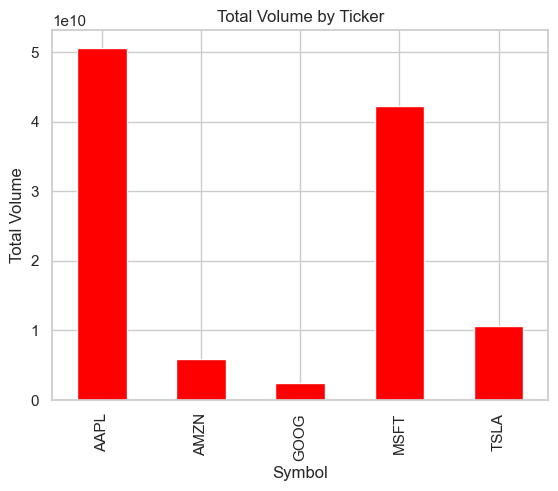

In [18]:
# List of symbols for 5 companies
companies = ['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA']

# Combine all 5 company symbols
all_symbols = companies

# Filter data for each industry
filtered_df = spark_df.filter(F.col('symbol').isin(all_symbols))

# Calculate total volume for each symbol
total_volume_df = filtered_df.groupBy('symbol').agg(F.sum('volume').alias('total_volume'))

# Convert PySpark DataFrame to Pandas for plotting
total_volume_pd = total_volume_df.toPandas()

# Plot total volume for each symbol using bar plot
total_volume_pd.plot(kind='bar', x='symbol', y='total_volume', color='red', legend=False)

plt.xlabel('Symbol')
plt.ylabel('Total Volume')
plt.title('Total Volume by Ticker')
plt.show()

The number of stocks for each company is represented by bar graph, where APPL has the highest followed by MSFT.

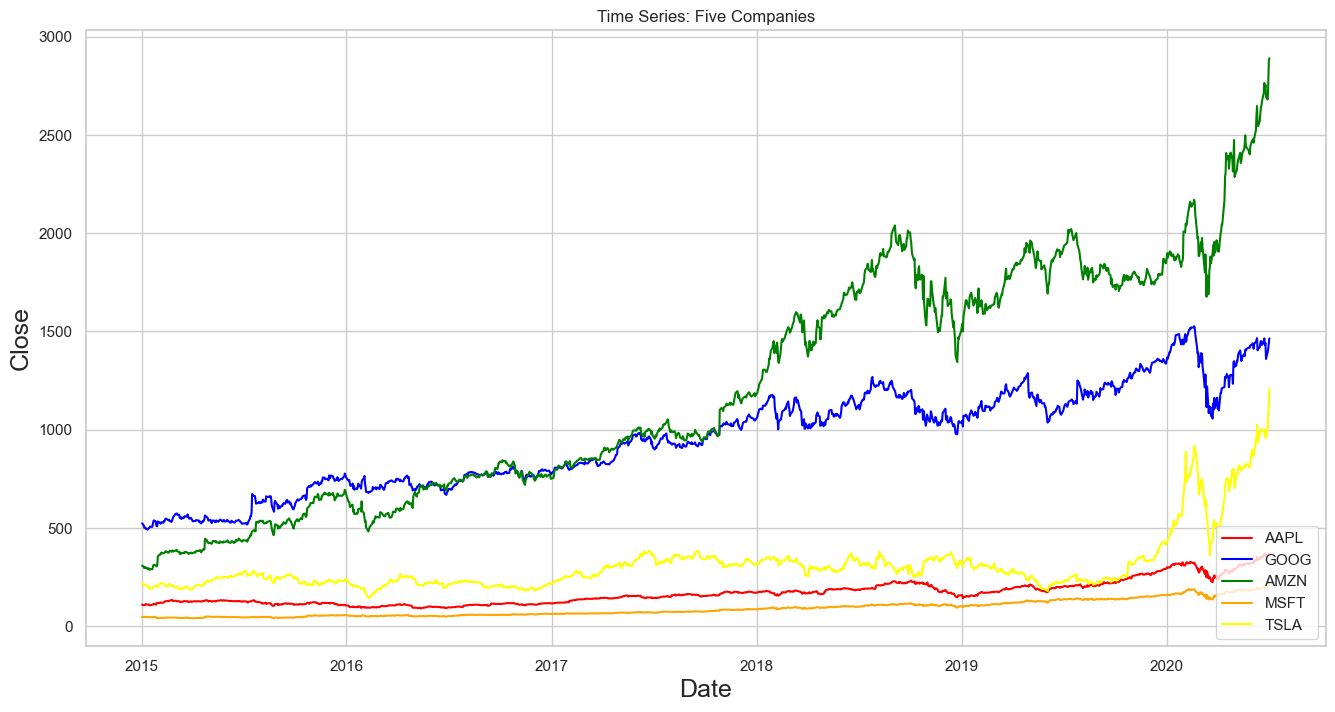

In [16]:
# Filter data for each company
AAPL_data = filtered_df.filter(filtered_df['symbol'] == 'AAPL').select('date', 'close').orderBy('date')
GOOG_data = filtered_df.filter(filtered_df['symbol'] == 'GOOG').select('date', 'close').orderBy('date')
AMZN_data = filtered_df.filter(filtered_df['symbol'] == 'AMZN').select('date', 'close').orderBy('date')
MSFT_data = filtered_df.filter(filtered_df['symbol'] == 'MSFT').select('date', 'close').orderBy('date')
TSLA_data = filtered_df.filter(filtered_df['symbol'] == 'TSLA').select('date', 'close').orderBy('date')

# Convert PySpark DataFrames to Pandas DataFrames
AAPL_pd = AAPL_data.toPandas()
GOOG_pd = GOOG_data.toPandas()
AMZN_pd = AMZN_data.toPandas()
MSFT_pd = MSFT_data.toPandas()
TSLA_pd = TSLA_data.toPandas()

# Plot the data using Matplotlib
plt.figure(figsize=(16, 8))
plt.plot(AAPL_pd['date'], AAPL_pd['close'], color='red')
plt.plot(GOOG_pd['date'], GOOG_pd['close'], color='blue')
plt.plot(AMZN_pd['date'], AMZN_pd['close'], color='green')
plt.plot(MSFT_pd['date'], MSFT_pd['close'], color='orange')
plt.plot(TSLA_pd['date'], TSLA_pd['close'], color='yellow')
plt.title('Time Series: Five Companies')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.legend(['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA'], loc='lower right')
plt.show()

A line graph between 2015-2020 years and closing price is plotted. A clear upward trend is visible in the stock prices of Amazon (AMZN) from 2015 to 2020, where the exponential growth is seen after 2018. In the beginning of 2015, Google (GOOG) exhibited the highest stock price but later surpassed by AMZN, especially in mid-2016. Although there were variations for Tesla (TSLA), it seems to be more steady till 2020. In 2019 and mid-2019, AMZN and GOOG have a major dip, and in post-2020, except Microsoft (MSFT), all other stocks are increased and decreased and then finally increased again. There were no major changes in Apple (APPL) and MSFT. In conclusion, there were a lot of transactions happen in AMZN when compared to other 4 stocks.

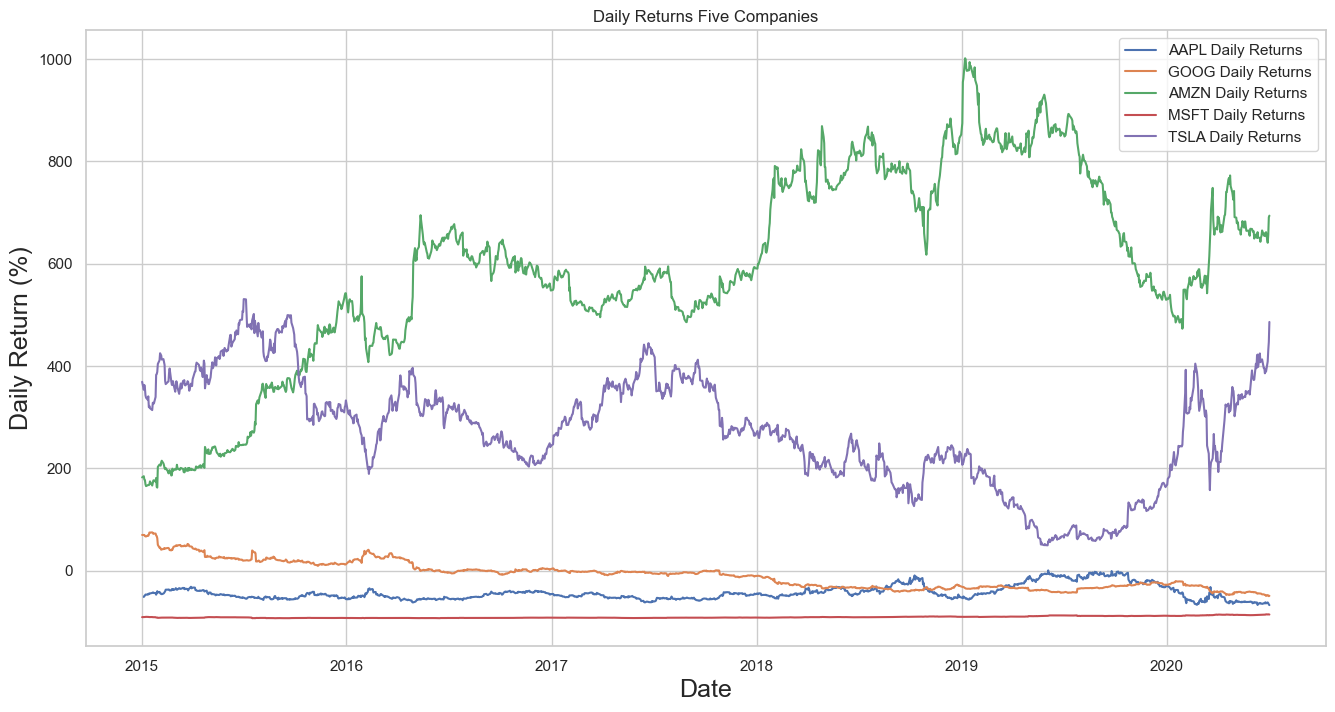

In [19]:
# List of 5 company symbols
company_symbols = ['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA']

# Filter data for companies
data = filtered_df.filter(col('symbol').isin(company_symbols)).orderBy('date')

# Create a Window specification
windowSpec = Window().orderBy('date')

# Calculate daily returns using lag function within the Window
data = data.withColumn('lag_close', F.lag('close').over(windowSpec))
data = data.withColumn('daily_return', (F.col('close') / F.col('lag_close') - 1) * 100)

# Convert PySpark DataFrame to Pandas DataFrame for easier plotting
comp_pd = data.toPandas()

# Daily Returns
plt.figure(figsize=(16, 8))
for symbol in company_symbols:
    symbol_data = comp_pd[comp_pd['symbol'] == symbol]
    plt.plot(symbol_data['date'], symbol_data['daily_return'], label=f'{symbol} Daily Returns')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Daily Return (%)', fontsize=18)
plt.title('Daily Returns Five Companies')
plt.legend()
plt.show()


Daily returns are calculated to check the day-to-day fluctuations in prcining of each stocks. AMZN displayed a remarkable daily return percentage, touching 1000 in 2019. In the beginning, TSLA was leading when all 5 stocks first taken into consideration then it started to have lot of fluctautions with a drop of nearly 100 in the mid-2019. GOOG and APPL has less volatility with some overlaps inbetween both. There is no change in MSFT daily returns. Overall, AMZN has the best daily returns, whereas MSFT is the wordt.

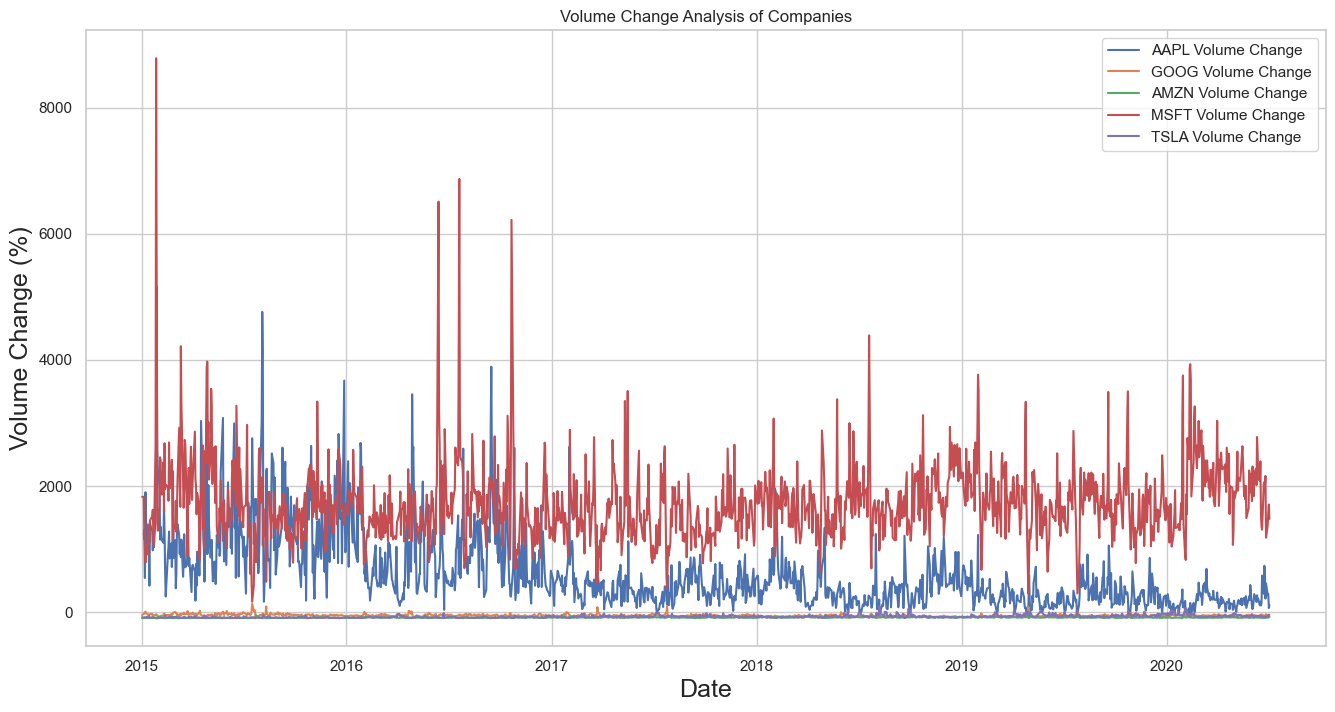

In [20]:
# List of company symbols
company_symbols = ['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA']


# Filter data for companies
data = filtered_df.filter(col('symbol').isin(company_symbols)).orderBy('date')

# Create a Window specification
windowSpec = Window().orderBy('date')

# Calculate daily returns using lag function within the Window
data = data.withColumn('lag_volume', F.lag('volume').over(windowSpec))
data = data.withColumn('volume_change', (F.col('volume') / F.col('lag_volume') - 1) * 100)

# Convert PySpark DataFrame to Pandas DataFrame for easier plotting
pd = data.toPandas()


# Plot Volume Change for Each Company
plt.figure(figsize=(16, 8))
for symbol in company_symbols:
    symbol_data = pd[pd['symbol'] == symbol]
    plt.plot(symbol_data['date'], symbol_data['volume_change'], label=f'{symbol} Volume Change')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume Change (%)', fontsize=18)
plt.title('Volume Change Analysis of Companies')
plt.legend()
plt.show()

When comparing volume against date , MSFT exhibits higher average trading volumes, indicating that more bulk of volume is transacted each year and experiences frequent and significant trading activity over time. AAPL is closely followed by MSFT where it also has large amount of volume transacted each year. However, other 3 stocks have no noticable movement when xompared with MSFT and AAPL.

# Moving Average

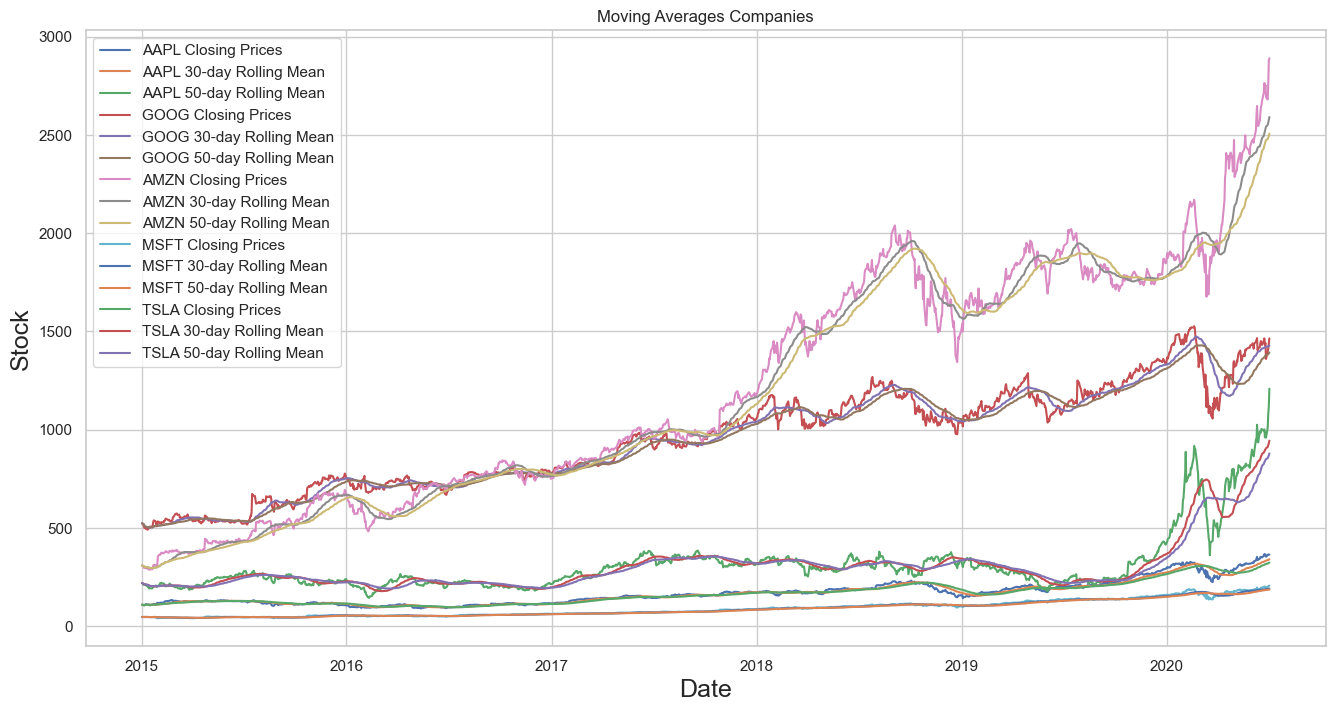

In [21]:
from pyspark.sql import SparkSession
from pyspark.sql import Window
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# List of company symbols
company_symbols = ['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA']

# Filter data for companies
filtered_df = spark_df.filter(F.col('symbol').isin(company_symbols)).orderBy('date')

# Create a Window specification
windowSpec = Window().partitionBy('symbol').orderBy('date').rowsBetween(-30, 0)  # 30-day rolling window

# Calculate 30-day rolling mean for each stock
filtered_df = filtered_df.withColumn('rolling_mean_30', F.avg('close').over(windowSpec))

# Create a Window specification for a 50-day rolling window
windowSpec = Window().partitionBy('symbol').orderBy('date').rowsBetween(-50, 0)  # 50-day rolling window

# Calculate 50-day rolling mean for each stock
filtered_df = filtered_df.withColumn('rolling_mean_50', F.avg('close').over(windowSpec))

# Convert PySpark DataFrame to Pandas DataFrame for easier plotting
pd_df = filtered_df.toPandas()

# Plot Moving Averages for Each Company
plt.figure(figsize=(16, 8))
for symbol in company_symbols:
    symbol_data = pd_df[pd_df['symbol'] == symbol]
    plt.plot(symbol_data['date'], symbol_data['close'], label=f'{symbol} Closing Prices')
    plt.plot(symbol_data['date'], symbol_data['rolling_mean_30'], label=f'{symbol} 30-day Rolling Mean')
    plt.plot(symbol_data['date'], symbol_data['rolling_mean_50'], label=f'{symbol} 50-day Rolling Mean')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Stock', fontsize=18)
plt.title('Moving Averages Companies')
plt.legend()
plt.show()


Moving averages are statistical tools used in stock market analysis that help identify trends by reducing noise in price data. All 5 companies (APPL, MSFT, GOOG, TSLA, and AMZN) are plotted with 30-day and 50-day rolling averages, where the average closing price over the respective time periods are claculated. These moving averages reduce fluctuations in short termto get more clear overall trends. All 5 stocks move in the upward trend. 

# Descriptive Analysis

In [22]:
from pyspark.sql.functions import col, mean, stddev, min, max

# Display summary statistics for each selected car company
for company in companies:
    # Filter DataFrame for the current car company
    current_company_df = filtered_df.filter(col('symbol') == company)
    
    # Calculate summary statistics
    current_company_summary_stats = current_company_df.describe()
    
    # Show the result
    print(f"Summary Statistics for {company}:")
    current_company_summary_stats.show(truncate=False)
    print("\n" + "="*50 + "\n")  # Separator line

Summary Statistics for AAPL:
+-------+--------------------+-----------------+------------------+------------------+------------------+------------------+------+------------------+------------------+
|summary|volume              |open             |high              |low               |close             |adjclose          |symbol|rolling_mean_30   |rolling_mean_50   |
+-------+--------------------+-----------------+------------------+------------------+------------------+------------------+------+------------------+------------------+
|count  |1385                |1385             |1385              |1385              |1385              |1385              |1385  |1385              |1385              |
|mean   |3.653794259927798E7 |167.9456317832754|169.63541523076137|166.40239724940773|168.10501793265772|162.78806692185384|NULL  |165.48732448106244|163.98601378552482|
|stddev |1.8070004946072605E7|60.6433408062633 |61.58540721499863 |59.98708720114606 |60.88873372877762 |63.0459315467226

The summary statistics for all 5 stocks include count, mean, standard deviation, minimum, and maximum values for various financial metrics in stock market such as volume, open, high, low, close, adjclose, along with rolling mean values for a 30-day and 50-day period. AMZN has higher mean values for all atrributes, exhibiting higher average trading volume and stock prices. TSLA exhibits higher volatility, indicating a greater degree of price variability and market uncertainty compared to the other stocks. GOOG shows relatively strong performance, indicating that the calculated rolling means for this stock exhibit a consistent and positive trend over time.

# AAPL Stock

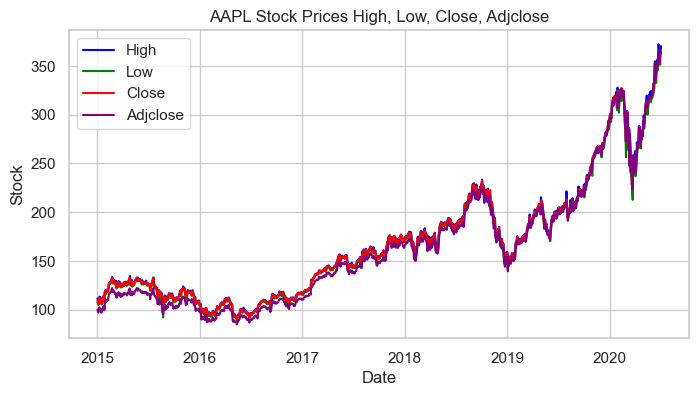

In [23]:
selected_stock = 'AAPL'
stock_df = spark_df.filter(F.col('symbol') == selected_stock).toPandas()

# Plotting the 'high', 'low', 'close', and 'adjclose' columns
plt.figure(figsize=(8, 4))

plt.plot(stock_df['date'], stock_df['high'], label='High', color='blue')
plt.plot(stock_df['date'], stock_df['low'], label='Low', color='green')
plt.plot(stock_df['date'], stock_df['close'], label='Close', color='red')
plt.plot(stock_df['date'], stock_df['adjclose'], label='Adjclose', color='purple') 

plt.title(f'{selected_stock} Stock Prices High, Low, Close, Adjclose')
plt.xlabel('Date')
plt.ylabel('Stock')
plt.legend()
plt.show()


AAPL stock is decreased till 2016; after 2016, there was an upward trend eventhough it decreases in later years. Open is basically closing price of the previous day; so, open is not considered. It can be noted that there is no visible variations in high, low, close, and adjclose values, indicating all are more similar to one another.

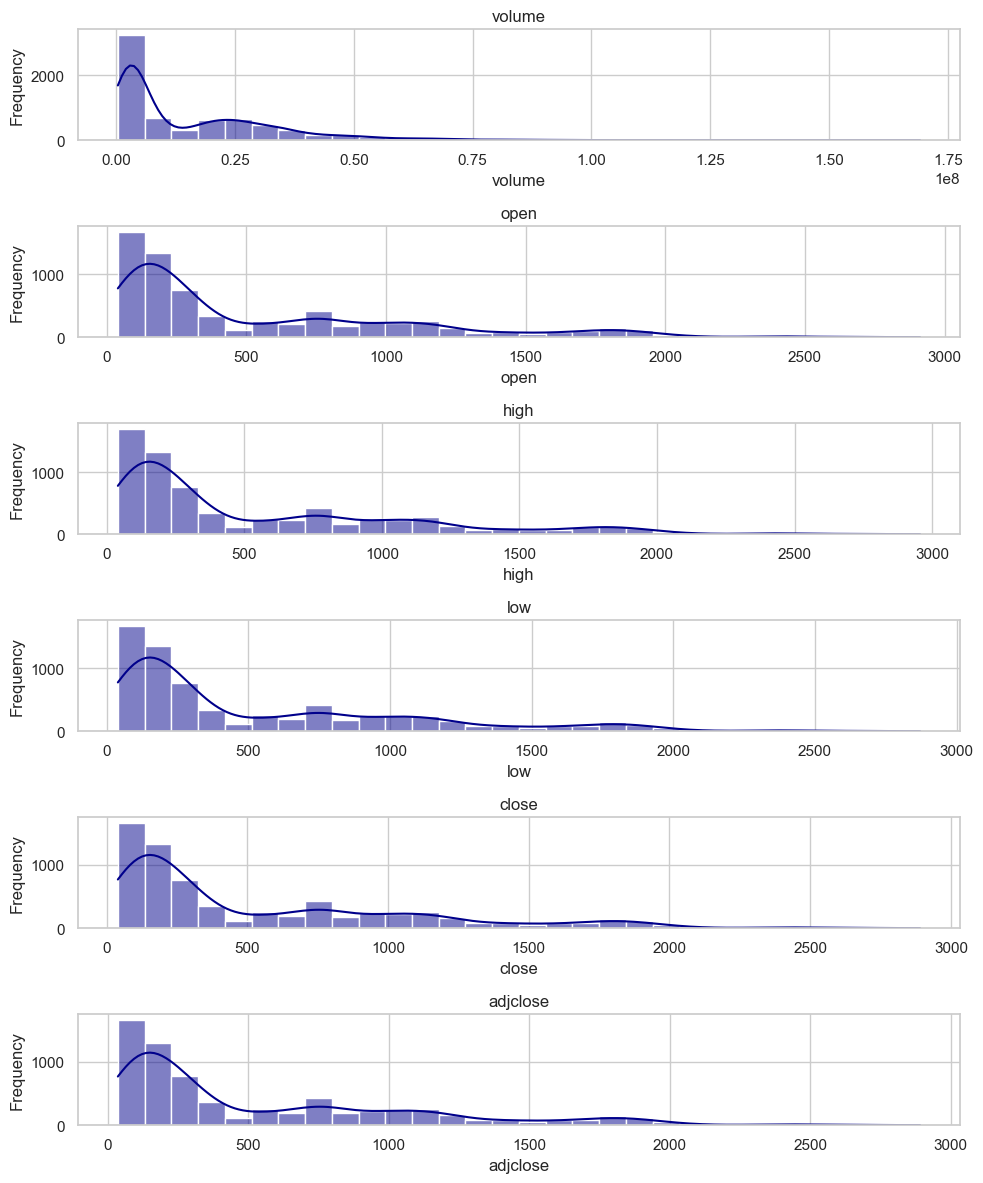

In [30]:
import seaborn as sns

# Select numerical columns for distribution exploration
numerical_columns = ['volume', 'open', 'high', 'low', 'close', 'adjclose']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 12))

# Plot histograms for each numerical feature with dark blue color
for i, column in enumerate(numerical_columns):
    sns.histplot(pandas_df[column], bins=30, kde=True, ax=axes[i], color='darkblue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


Histograms are used to fine the distribution of each column. As mentioned above, all open, close, high, low, and adjclose are similar. Hence, all plots are showing the same frqency plots other than volume

# Pair Plot

C:\Users\Geetha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


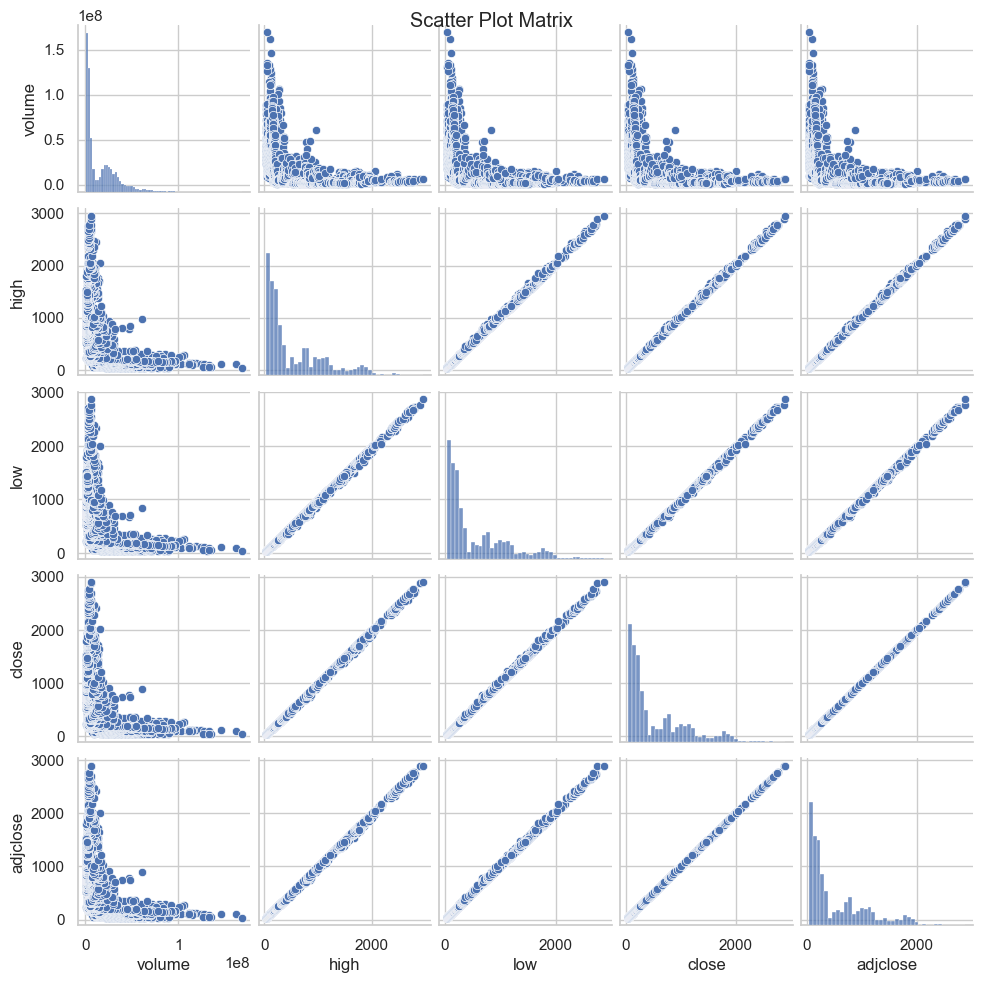

C:\Users\Geetha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


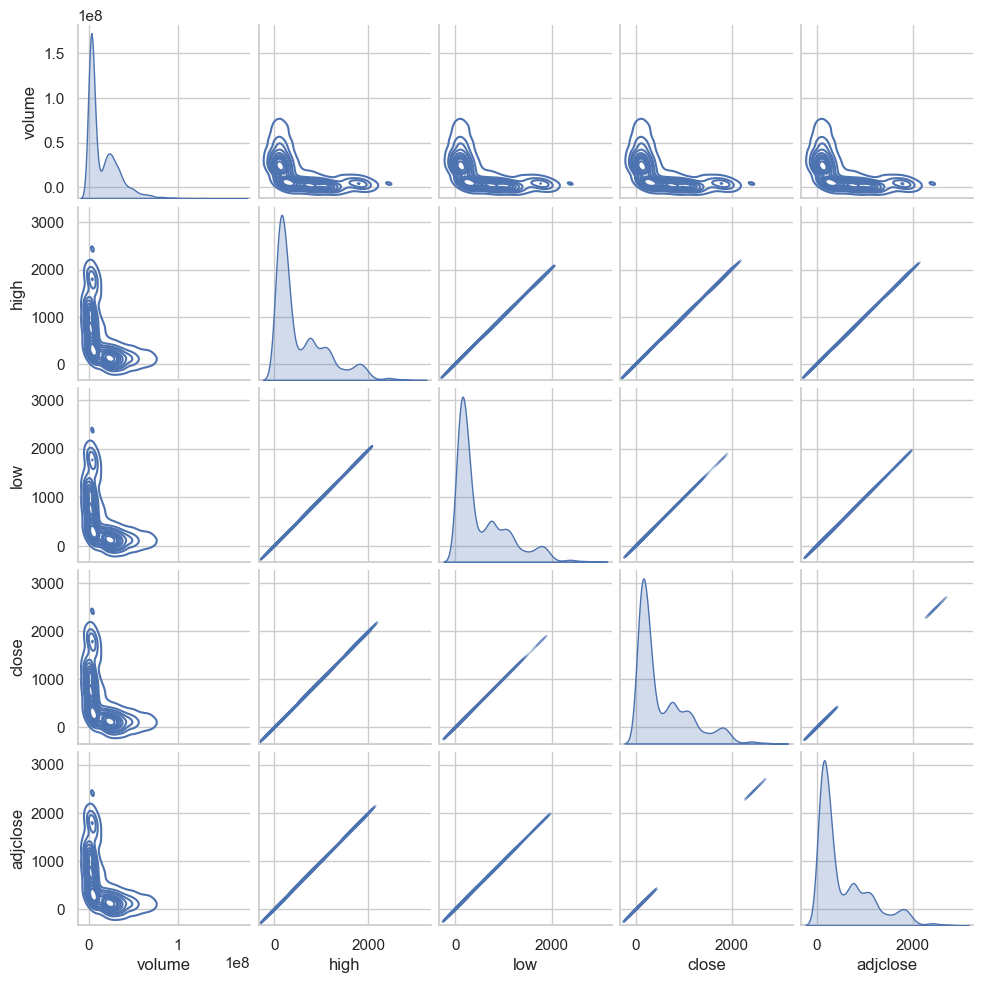

In [25]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = filtered_df.toPandas()

# Select numerical columns for the scatter plot matrix
numerical_columns = ['volume', 'high', 'low', 'close', 'adjclose']

# Create scatter plot matrix
scatter_matrix = sns.pairplot(pandas_df[numerical_columns], height=2)

# Display the scatter plot matrix
plt.suptitle('Scatter Plot Matrix')
plt.show()

# Create density plot matrix
density_matrix = sns.pairplot(pandas_df[numerical_columns], kind='kde', height=2)


These plots are used to identify where the majority of values lie and to determine whether there is any relationship between each feature.

# Correlation Heatmap

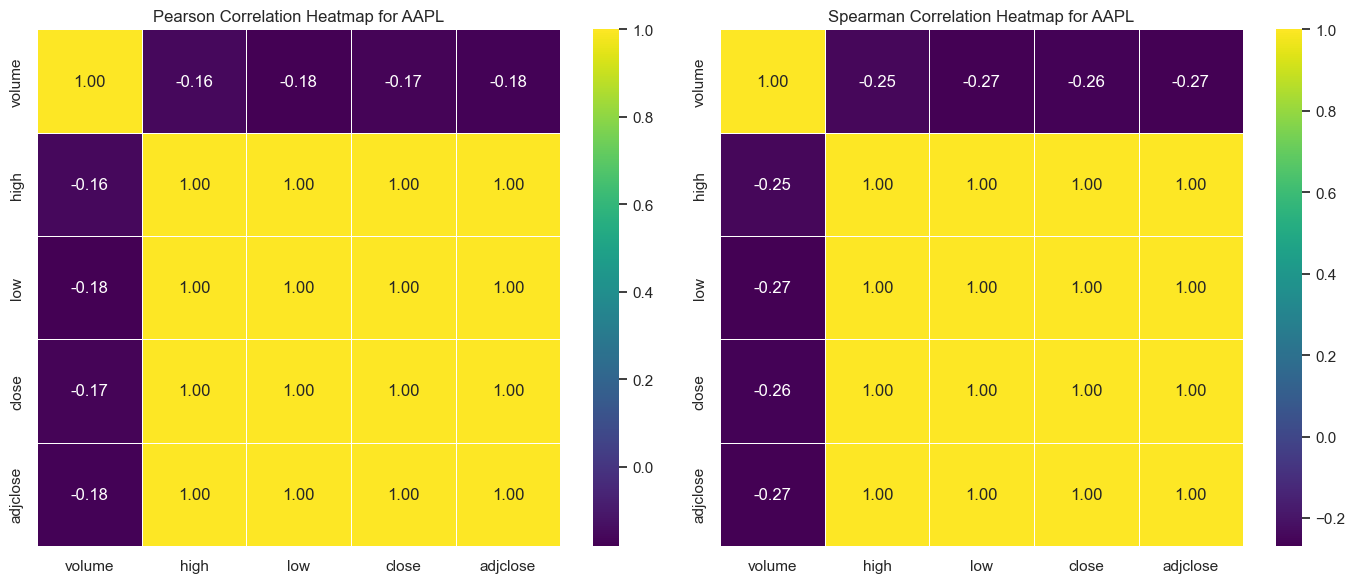

In [27]:
import seaborn as sns

# Select only numerical columns
numerical_columns = ['volume', 'high', 'low', 'close', 'adjclose']

# Filter DataFrame to include only 'AAPL' stock and numerical columns
aapl_df = filtered_df.filter(F.col('symbol') == 'AAPL').select(*numerical_columns)

# Convert the filtered DataFrame to Pandas for correlation calculation and visualization
pandas_df_aapl = aapl_df.toPandas()

# Calculate Pearson correlation
pearson_corr_aapl = pandas_df_aapl.corr(method='pearson')

# Calculate Spearman correlation
spearman_corr_aapl = pandas_df_aapl.corr(method='spearman')

# Set up subplots for visualizations
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot Pearson correlation heatmap for AAPL
sns.heatmap(pearson_corr_aapl, annot=True, cmap='viridis', fmt='.2f', linewidths=.5, ax=axes[0])
axes[0].set_title('Pearson Correlation Heatmap for AAPL')

# Plot Spearman correlation heatmap for AAPL
sns.heatmap(spearman_corr_aapl, annot=True, cmap='viridis', fmt='.2f', linewidths=.5, ax=axes[1])
axes[1].set_title('Spearman Correlation Heatmap for AAPL')

plt.tight_layout()
plt.show()


To check the correlation,

if the value is near to -1, then it is strong negative correlation

if the value is near to 0, then it is weak correlation

if the value is near to +1, then it is strong positive correlation

As the values of high, low, close, and adjclose are the same, all the correlation is represented as 1.


# Stop the SparkSession
spark.stop()

In [162]:
# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates


# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

In [163]:
from pyspark.sql.functions import col

# Filtering apple dataset

aapl_df = ['AAPL']
aapl_spark = filtered_df.filter(col('symbol').isin(aapl_df))

# Show the filtered apple dataset
aapl_spark.show()

+----------+---------+------------------+------------------+------------------+------------------+------------------+------+------------------+------------------+
|      date|   volume|              open|              high|               low|             close|          adjclose|symbol|   rolling_mean_30|   rolling_mean_50|
+----------+---------+------------------+------------------+------------------+------------------+------------------+------+------------------+------------------+
|2015-01-02| 53204600|111.38999938964844|111.44000244140624| 107.3499984741211|109.33000183105469| 99.94588470458984|  AAPL|109.33000183105469|109.33000183105469|
|2015-01-05| 64285500|108.29000091552734| 108.6500015258789|105.41000366210938|            106.25| 97.13024139404295|  AAPL|107.79000091552734|107.79000091552734|
|2015-01-06| 65797100|106.54000091552734|107.43000030517578|104.62999725341795|106.26000213623048| 97.13941955566406|  AAPL|107.28000132242839|107.28000132242839|
|2015-01-07| 40105900|

APPL stock is filtered out from the total of 5 stocks.

In [164]:
#Converting apple spark dataset to pandas
aapl_df = aapl_spark.toPandas()

In [165]:
#show apple dataframe
aapl_df

,date,volume,open,high,low,close,adjclose,symbol,rolling_mean_30,rolling_mean_50
0,2015-01-02,53204600,111.389999,111.440002,107.349998,109.330002,99.945885,AAPL,109.330002,109.330002
1,2015-01-05,64285500,108.290001,108.650002,105.410004,106.250000,97.130241,AAPL,107.790001,107.790001
2,2015-01-06,65797100,106.540001,107.430000,104.629997,106.260002,97.139420,AAPL,107.280001,107.280001
3,2015-01-07,40105900,107.199997,108.199997,106.699997,107.750000,98.501518,AAPL,107.397501,107.397501
4,2015-01-08,59364500,109.230003,112.150002,108.699997,111.889999,102.286186,AAPL,108.296001,108.296001
...,...,...,...,...,...,...,...,...,...,...
1380,2020-06-26,51314200,364.410004,365.320007,353.019989,353.630005,353.630005,AAPL,333.951935,317.118431
1381,2020-06-29,32661500,353.250000,362.170013,351.279999,361.779999,361.779999,AAPL,335.637096,318.590784
1382,2020-06-30,35055800,360.079987,365.980011,360.000000,364.799988,364.799988,AAPL,337.478709,320.198627
1383,2020-07-01,27684300,365.119995,367.359985,363.910004,364.109985,364.109985,AAPL,339.064192,321.908039


In [166]:
#Creating new data frame for building model with close values from apple dataframe.
new_df = aapl_df.reset_index()['close']

In [167]:
# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates


# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

In [168]:
# Normalizing our data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new_df).reshape(-1,1))

Normalization of the values is performed to make all the values to be consistent, so the optimization algorthms work faster and all the values are treated equally. 

In [169]:
scaled_data.shape

(1385, 1)

In [170]:
# Split into training and testing sets
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

80% of data is used for training of the model.

In [171]:
# Define the sequence length (number of past time steps)
n_past = 100

# Prepare sequences for LSTM
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)


Sequences of length from training and testing data for training an LSTM model is created, where each sequence represents a historical window used to predict the next time step.

In [172]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(1008, 100)
(1008,)


Testing set size:-
(177, 100)
(177,)


(None, None)

In [173]:
# Reshape input data for LSTM([samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [174]:
# Initialize a sequential model
model = Sequential()

# First LSTM layer with 50 units, input shape, and return sequences
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))         # Adding dropout to prevent overfitting

# Second LSTM layer with 50 units and return sequences
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer with 50 units
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))

A sequential model for a Long Short-Term Memory (LSTM) neural network with three layers is initialized, each containing 50 units, and dropout layers to prevent overfitting, followed by a dense output layer with one unit.

In [175]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_15 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_16 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [176]:
model.compile(loss='mean_squared_error',optimizer='adam')

!pip install --upgrade tensorflow keras


In [177]:
# Training our lstm model
history = model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,validation_split=0.1)

Epoch 1/50
16/16 [==============================] - 19s 454ms/step - loss: 0.0157 - val_loss: 0.1111
Epoch 2/50
16/16 [==============================] - 4s 261ms/step - loss: 0.0034 - val_loss: 0.0151
Epoch 3/50
16/16 [==============================] - 5s 306ms/step - loss: 0.0017 - val_loss: 0.0059
Epoch 4/50
16/16 [==============================] - 5s 299ms/step - loss: 0.0013 - val_loss: 0.0117
Epoch 5/50
16/16 [==============================] - 4s 285ms/step - loss: 0.0013 - val_loss: 0.0052
Epoch 6/50
16/16 [==============================] - 5s 311ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 7/50
16/16 [==============================] - 5s 334ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 8/50
16/16 [==============================] - 5s 302ms/step - loss: 0.0011 - val_loss: 0.0074
Epoch 9/50
16/16 [==============================] - 5s 325ms/step - loss: 0.0010 - val_loss: 0.0088
Epoch 10/50
16/16 [==============================] - 5s 321ms/step - loss: 9.4758e-04 - val_loss: 0

An LSTM model is trained using historical data with 50 epochs, a batch size of 64, and validation data, storing the training history in the 'history' variable.

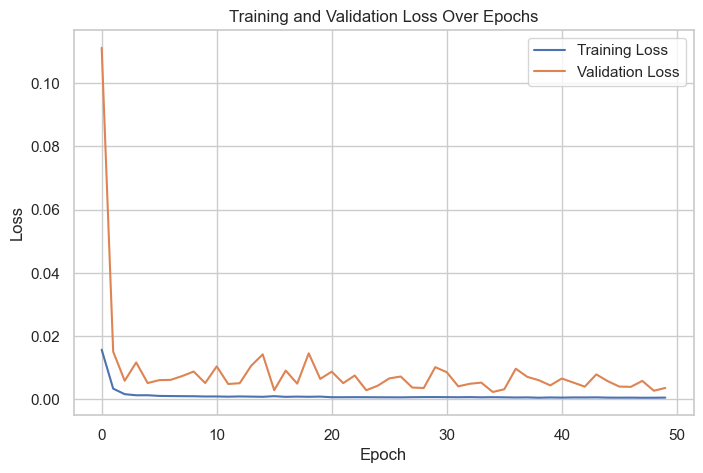

In [178]:
# Plot training loss and validation loss across epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training loss remains consistently low and stable, while the validation loss exhibits slight variations.

In [179]:
# Let's do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 61ms/step


In [180]:
test_predict

array([[0.51744473],
       [0.5220777 ],
       [0.52630335],
       [0.5305777 ],
       [0.534877  ],
       [0.53952247],
       [0.5447615 ],
       [0.54913473],
       [0.5520316 ],
       [0.55438036],
       [0.55782825],
       [0.5628769 ],
       [0.56904507],
       [0.57560205],
       [0.5822465 ],
       [0.58858657],
       [0.594577  ],
       [0.59985554],
       [0.6046195 ],
       [0.60836184],
       [0.61149865],
       [0.61433154],
       [0.6166676 ],
       [0.6177438 ],
       [0.61720157],
       [0.6151602 ],
       [0.61293894],
       [0.6106873 ],
       [0.60928977],
       [0.6087989 ],
       [0.60844576],
       [0.6069898 ],
       [0.6047282 ],
       [0.6027716 ],
       [0.6025756 ],
       [0.6035658 ],
       [0.6055975 ],
       [0.6087433 ],
       [0.61277074],
       [0.61795795],
       [0.6248432 ],
       [0.6330169 ],
       [0.64150375],
       [0.6494785 ],
       [0.6561648 ],
       [0.6620963 ],
       [0.6672854 ],
       [0.672

In [181]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [182]:
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [183]:
y_test

array([[240.50999451],
       [239.96000671],
       [243.17999268],
       [243.58000183],
       [246.58000183],
       [249.05000305],
       [243.28999329],
       [243.25999451],
       [248.75999451],
       [255.82000732],
       [257.5       ],
       [257.13000488],
       [257.23999023],
       [259.42999268],
       [260.14001465],
       [262.20001221],
       [261.95999146],
       [264.47000122],
       [262.64001465],
       [265.76000977],
       [267.1000061 ],
       [266.29000854],
       [263.19000244],
       [262.01000977],
       [261.77999878],
       [266.36999512],
       [264.29000854],
       [267.83999634],
       [267.25      ],
       [264.16000366],
       [259.45001221],
       [261.73999023],
       [265.57998657],
       [270.70999146],
       [266.92001343],
       [268.48001099],
       [270.76998901],
       [271.45999146],
       [275.1499939 ],
       [279.85998535],
       [280.41000366],
       [279.73999023],
       [280.01998901],
       [279

# Calculate train data RMSE
print(math.sqrt(mean_squared_error(y_train,train_predict)))
# Calculate test data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

In [185]:
from sklearn.metrics import mean_absolute_percentage_error

In [186]:
MAPE = mean_absolute_percentage_error(y_test, test_predict)
Accuracy = 1 - MAPE

print(MAPE)
print(Accuracy)

0.049661567673301286
0.9503384323266987


MAPE is calculated for the predicted values against the actual values, resulting in an accuracy of 95.03%.

In [187]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, test_predict)
print(f'R-squared: {r2}')

R-squared: 0.7502011203842265


The R2 value of 0.75 suggests that the model explains about 75% of the variability in the data, indicating a moderately good fit.

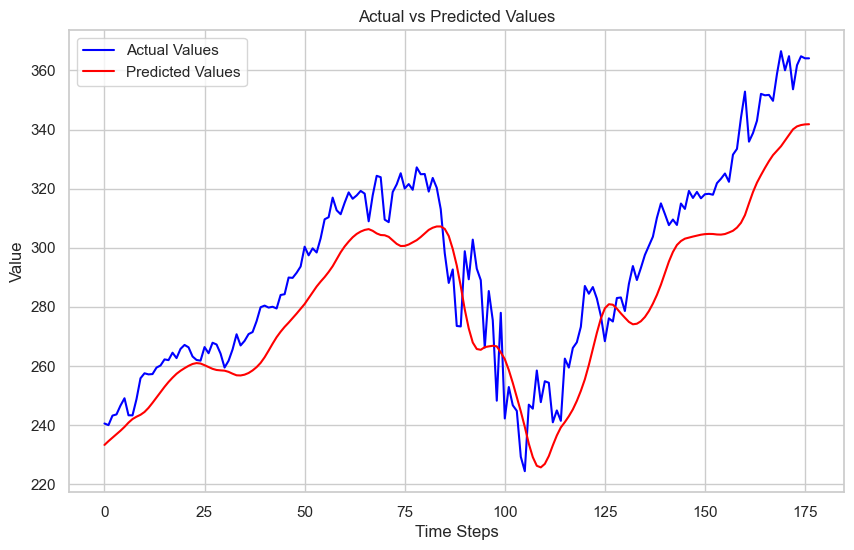

In [188]:
# Visualize the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(test_predict, label='Predicted Values', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

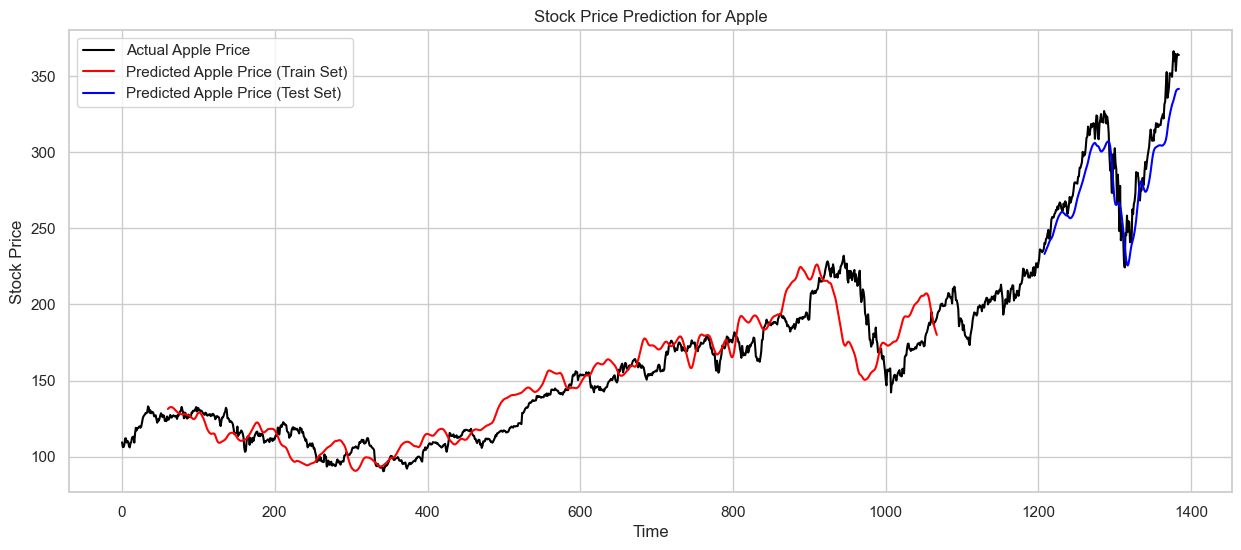

In [189]:
# Set the number of previous time steps to consider for plotting
look_back = 60

# Initialize an array for plotting the train predictions
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:] = np.nan
# Assign the predicted values to the appropriate location for train predictions
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict

# Initialize an array for plotting the test predictions
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:] = np.nan
# Calculate the starting index for the test predictions
test_start = len(scaled_data) - len(test_predict)
# Assign the predicted values to the appropriate location for test predictions
testPredictPlot[test_start:] = test_predict

# Rescale the scaled data back to its original scale using the scaler
original_scaled_data = scaler.inverse_transform(scaled_data)

# Plotting the baseline data, training predictions, and test predictions
plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label="Actual Apple Price")
plt.plot(trainPredictPlot, color='red', label="Predicted Apple Price (Train Set)")
plt.plot(testPredictPlot, color='blue', label="Predicted Apple Price (Test Set)")

plt.title("Stock Price Prediction for Apple")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


Previous 60 time steps are considered for plotting, and arrays are initialized to visualize the training and test predictions compared to the actual Apple stock prices, with predictions rescaled back to the original scale using the scaler.

In [190]:
# To predict for the next 10 days, you'll need the last n_past days of data
last_sequence = X_test[-1]

# Reshape the last_sequence to match the input shape of the model
last_sequence = last_sequence.reshape(1, n_past, 1)

# Generate predictions for the next 10 days
predictions_next_10_days = []
for _ in range(10):
    next_day_prediction = model.predict(last_sequence)
    predictions_next_10_days.append(next_day_prediction[0, 0])  # Get the predicted value
    last_sequence = np.roll(last_sequence, -1, axis=1)  # Shift the sequence by one day
    last_sequence[0, -1, 0] = next_day_prediction  # Update the last element with the new prediction

# Transform the predictions back to the original scale
predictions_next_10_days = scaler.inverse_transform(np.array(predictions_next_10_days).reshape(-1, 1))

# Print the predictions for the next 10 days
print("Predictions for the next 10 days:")
for i, prediction in enumerate(predictions_next_10_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 85ms/step
Predictions for the next 10 days:
Day 1: Predicted Price = 341.8058776855469
Day 2: Predicted Price = 340.3052978515625
Day 3: Predicted Price = 337.1505126953125
Day 4: Predicted Price = 332.592529296875
Day 5: Predicted Price = 326.9803771972656
Day 6: Predicted Price = 320.63641357421875
Day 7: Predicted Price = 313.81585693359375
Day 8: Predicted Price = 306.7067565917969
Day 9: Predicted Price = 299.4443054199219
Day 10: Predicted Price = 292.12835693359375


The stock prices for the next 10 days using an LSTM model was predicted, generating predictions iteratively, and then transforming the predictions back to the original scale.

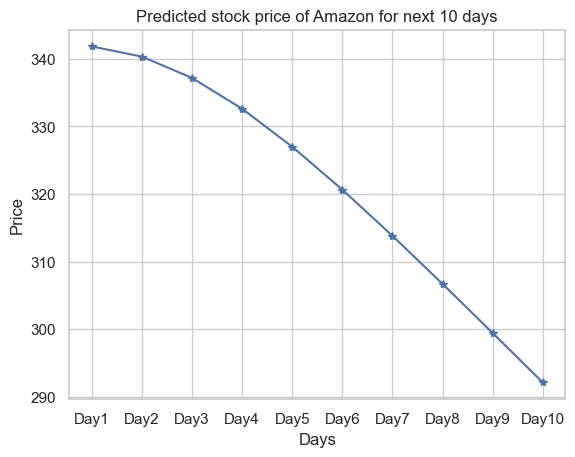

In [191]:
plt.plot(predictions_next_10_days, marker='*')
plt.title(f'Predicted stock price of Amazon for next 10 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 10), ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10'])
plt.grid(True)
plt.show()

From the above graph, it can be concluded that the price of the AAPL stock will decrease for the next 10 days.